In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.calibration import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split

# Show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import the data
df = pd.read_csv('diabetes_prediction_dataset.csv')
#df_test = pd.read_csv('Testing.csv')
count_0 = df['diabetes'].value_counts()[0]
count_1 = df['diabetes'].value_counts()[1]

# Randomly sample rows with 'diabetes' value 0 to match the count of 1s
if count_0 > count_1:
    df = df[df['diabetes'] == 0].sample(n=count_1, random_state=42).append(df[df['diabetes'] == 1])
elif count_1 > count_0:
    df = df[df['diabetes'] == 1].sample(n=count_0, random_state=42).append(df[df['diabetes'] == 0])

# Shuffle the DataFrame to mix the rows
df = df.sample(frac=1, random_state=42)

#df = df.drop(df.columns[-1], axis=1)

label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
df['smoking_history_encoded'] = label_encoder.fit_transform(df['smoking_history'])

df.head()

ModuleNotFoundError: No module named 'sklearn'

c:\Users\diren\.conda\envs\ml2_ws1_ws2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


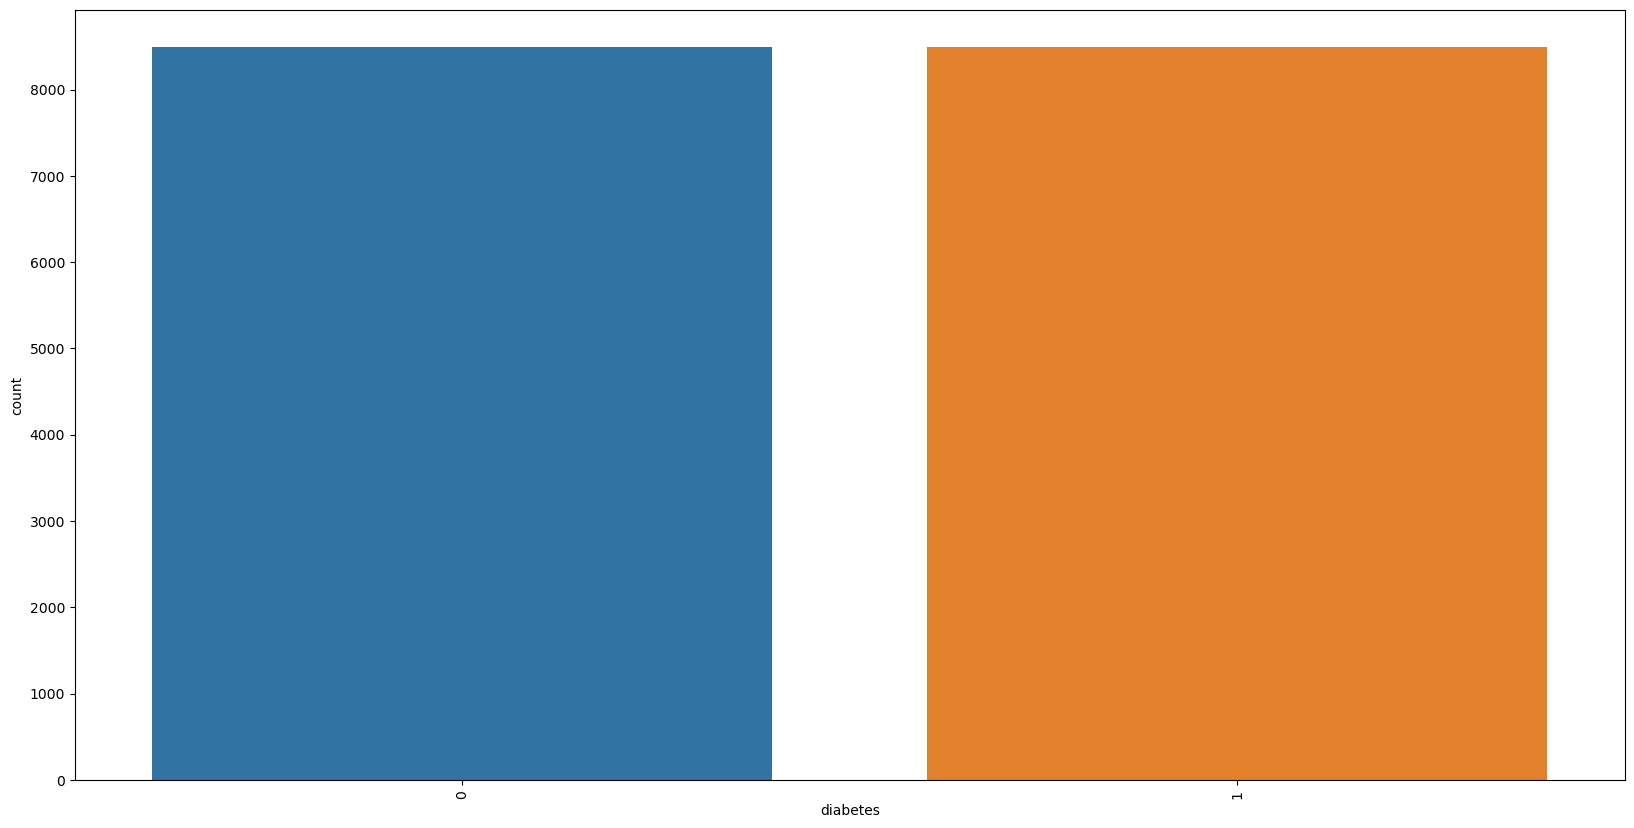

In [77]:
# Barplot of the prognosis
plt.figure(figsize=(20, 10))
sns.countplot(df['diabetes'])
plt.xticks(rotation=90)
plt.show()

In [78]:
df.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded
age,1.000000,0.247884,0.251844,0.259158,0.282732,0.267106,0.479512,0.008643,0.225550
hypertension,0.247884,1.000000,0.100419,0.155013,0.161501,0.140702,0.262691,0.008917,0.111725
heart_disease,0.251844,0.100419,1.000000,0.049290,0.132821,0.115456,0.214170,0.090820,0.029429
bmi,0.259158,0.155013,0.049290,1.000000,0.203311,0.187918,0.346435,-0.032572,0.171721
HbA1c_level,0.282732,0.161501,0.132821,0.203311,1.000000,0.324006,0.600681,0.043929,0.108488
blood_glucose_level,0.267106,0.140702,0.115456,0.187918,0.324006,1.000000,0.541595,0.040279,0.093181
diabetes,0.479512,0.262691,0.214170,0.346435,0.600681,0.541595,1.000000,0.066891,0.179360
gender_encoded,0.008643,0.008917,0.090820,-0.032572,0.043929,0.040279,0.066891,1.000000,-0.056986
smoking_history_encoded,0.225550,0.111725,0.029429,0.171721,0.108488,0.093181,0.179360,-0.056986,1.000000


In [79]:
# Split data into test and train
train, test = train_test_split(df, test_size=0.3, random_state=42)


# Split data into X and y

X_train = train[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_encoded', 'smoking_history_encoded']]
y_train = train['diabetes']

X_test = test[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_encoded', 'smoking_history_encoded']]
y_test = test['diabetes']



In [80]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
xtrain = scaler.fit_transform(X_train)
xtest = scaler.transform(X_test)

In [81]:
#model = Sequential(
#    [
#        Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
#        Dense(32, activation="relu"),
#        Dense(1, activation="sigmoid"),
#    ]
#)
#
#model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'AUC', 'MeanSquaredError'])

In [ ]:
model = model.load_weights('cnn.h5')

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'AUC', 'MeanSquaredError'])

In [82]:
history = model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=128,
    validation_data=(X_test, y_test),
)

Epoch 1/500
93/93 [==============================] - 8s 45ms/step - loss: 1.1832 - accuracy: 0.6057 - auc: 0.6244 - mean_squared_error: 0.2794 - val_loss: 0.6213 - val_accuracy: 0.6639 - val_auc: 0.7251 - val_mean_squared_error: 0.2145
Epoch 2/500
93/93 [==============================] - 1s 6ms/step - loss: 0.5714 - accuracy: 0.6941 - auc: 0.7896 - mean_squared_error: 0.1939 - val_loss: 0.5545 - val_accuracy: 0.6980 - val_auc: 0.8121 - val_mean_squared_error: 0.1873
Epoch 3/500
93/93 [==============================] - 1s 9ms/step - loss: 0.5343 - accuracy: 0.7140 - auc: 0.8236 - mean_squared_error: 0.1796 - val_loss: 0.5349 - val_accuracy: 0.6837 - val_auc: 0.8450 - val_mean_squared_error: 0.1841
Epoch 4/500
93/93 [==============================] - 1s 8ms/step - loss: 0.5126 - accuracy: 0.7253 - auc: 0.8395 - mean_squared_error: 0.1717 - val_loss: 0.5237 - val_accuracy: 0.7631 - val_auc: 0.8420 - val_mean_squared_error: 0.1737
Epoch 5/500
93/93 [==============================] - 1s 6ms

160/160 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.8967 - auc: 0.9697 - mean_squared_error: 0.0709


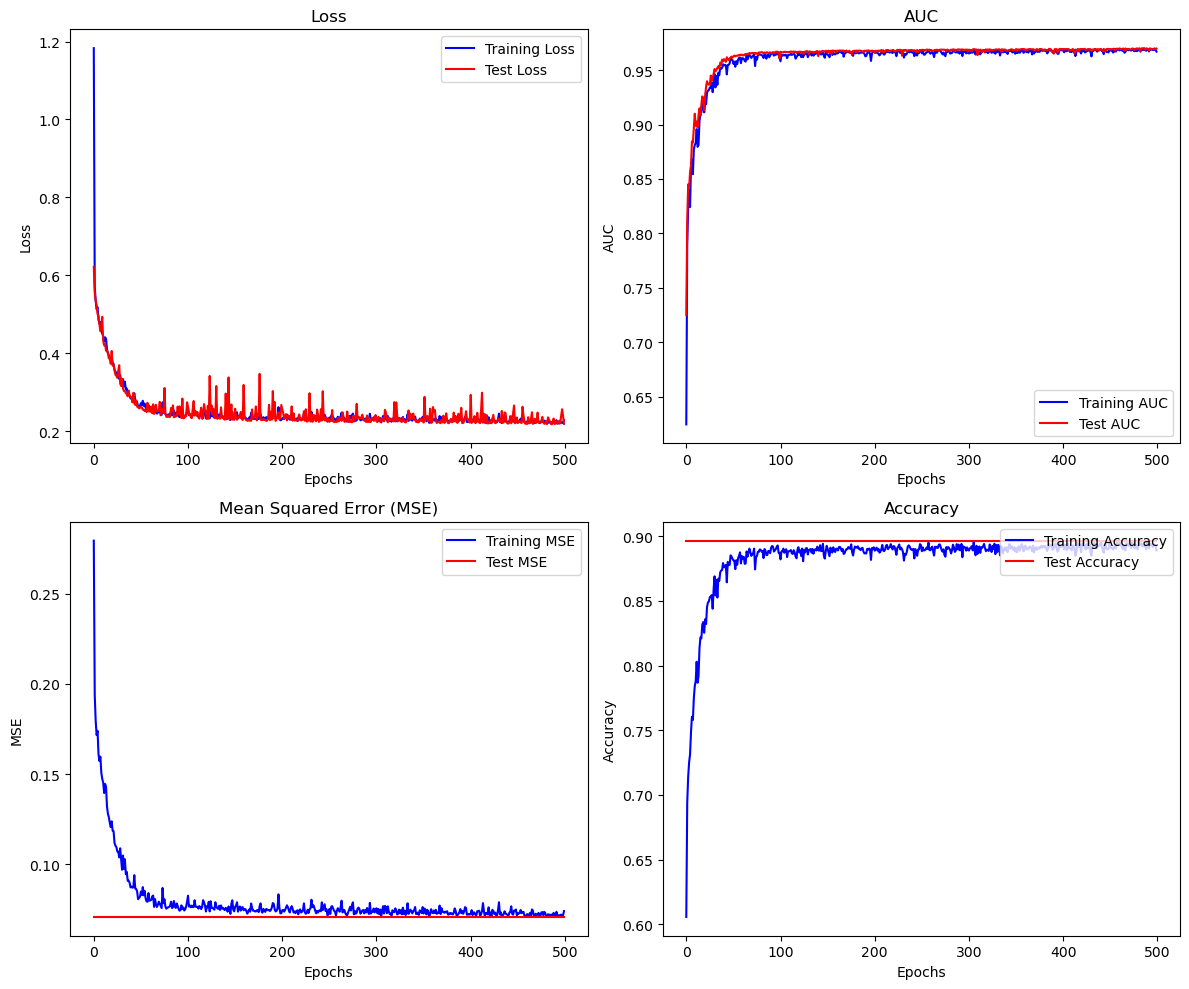

Test Loss: 0.21846823394298553


In [85]:
test_loss, test_accuracy, test_auc, test_mean_squared_error = model.evaluate(X_test, y_test)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Training and Test Loss
axes[0, 0].plot(history.history["loss"], label='Training Loss', color='b')
axes[0, 0].plot(history.history["val_loss"], label='Test Loss', color='r')
axes[0, 0].set_title('Loss')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend(loc='upper right')

# Plot Training and Test AUC
axes[0, 1].plot(history.history["auc"], label='Training AUC', color='b')
axes[0, 1].plot(history.history["val_auc"], label='Test AUC', color='r')
axes[0, 1].set_title('AUC')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('AUC')
axes[0, 1].legend(loc='lower right')

# Plot Training and Test Mean Squared Error (MSE)
axes[1, 0].plot(history.history["mean_squared_error"], label='Training MSE', color='b')
axes[1, 0].plot([test_mean_squared_error] * len(history.history["mean_squared_error"]), label='Test MSE', color='r')
axes[1, 0].set_title('Mean Squared Error (MSE)')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('MSE')
axes[1, 0].legend(loc='upper right')

# Plot Training and Test Accuracy
axes[1, 1].plot(history.history["accuracy"], label='Training Accuracy', color='b')
axes[1, 1].plot([test_accuracy] * len(history.history["accuracy"]), label='Test Accuracy', color='r')
axes[1, 1].set_title('Accuracy')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend(loc='upper right')

plt.tight_layout()
plt.show()
print("Test Loss:", test_loss)

model.save_weights('cnn.h5')
model.save("modeldigit.keras")


In [86]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Step 1: Make predictions on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=0)  # Convert one-hot encoded predictions to class labels

# Step 2: Compute the confusion matrix using true class labels
y_true_classes = np.argmax(y_test, axis=0)  # Convert one-hot encoded true labels to class labels
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Step 3: Calculate the F1-score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Save the classification report to a text file
with open('classification_report.txt', 'w') as report_file:
    report = classification_report(y_true_classes, y_pred_classes)
    report_file.write(report)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

# Print the F1-score
print("\nWeighted F1-Score:", f1)


TypeError: Singleton array 0 cannot be considered a valid collection.

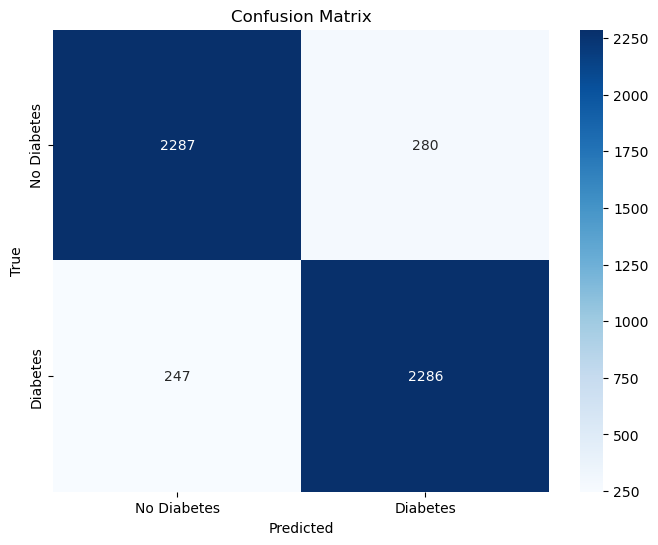

In [95]:
from sklearn.metrics import confusion_matrix

# Make predictions using your model on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Threshold predictions to convert probabilities to binary values (0 or 1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [96]:
(2307)/(313 + 2307) #Precision

0.8805343511450382

In [88]:
(2307)/(226 + 2307) #Recall

0.9107777339123568